# Phase 1: Inputs

In [3]:
import networkx as nx
from parse import validate_file, read_input_file, read_output_file, write_input_file, write_output_file
from utils import is_valid_solution, calculate_happiness, convert_dictionary
import sys
import random
import numpy as np

### 1. Test Run: Generate Input for Maximal Independent Sets

In [130]:
edgeList = list(G.edges)
nodeList = list(G.nodes)
m = G.number_of_edges() - 1
selected_nodes = []
n = G.number_of_nodes()
n_small = int(2 * np.log(n))
for i in range(n_small):
    while(True):
        k = random.randint(0, n - 1)
        if k not in selected_nodes:
            break
    selected_nodes.append(k)

selected_nodes.sort()
print("selected_nodes: ", selected_nodes)

for i in range(n_small):
    node = selected_nodes.pop(0);
    print("current node: ", node)
    for other_node in selected_nodes:
        e = (node, other_node)
        if e in edgeList:
            print("removing: ", e)
            edgeList.remove(e)
            G.remove_edge(*e)

selected_nodes:  [0, 2, 5]
current node:  0
removing:  (0, 2)
removing:  (0, 5)
current node:  2
removing:  (2, 5)
current node:  5


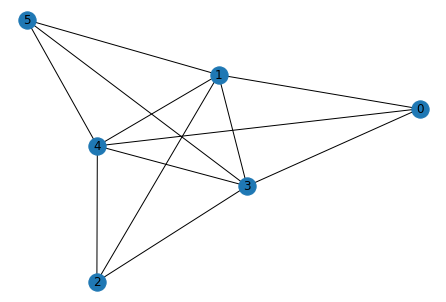

In [131]:
nx.draw(G, with_labels=True)

Randomize that s1,4 + s1,5 + s2,5 < Smax/k 

In [ ]:
Smax = 20
H = G.copy()
edgeList = list(H.edges)
nodeList = list(H.nodes)
n = G.number_of_nodes()
selected = [0, 2, 5]
others = list(set(nodeList) - set(selected))
print("others: ", others)

for i in range(len(selected)):
    node = selected.pop(0);
    print("current node: ", node)
    for other_node in selected:
        e = (node, other_node)

### 2. Create a Graph with weight randomly assigned

***Hint***: if you create a random unweighted undirected graph, and then you pick a small set (2logn) of nodes at random, and force it to be an independent set by removing all edges among them, this is still likely to be a hard input to the independent set problem.

In [4]:
def generate_solution(selected, n_nodes): 
    others = list(set(range(n_nodes)) - set(selected))
    n_rooms = len(others) + 1
    room_assignments = {}
    room_assignments[0] = selected
    for i in range(n_rooms - 1): 
        room_assignments[i + 1] = [others[i]]
    return convert_dictionary(room_assignments)

**Note:** To prevent rounidng errors, we generate integers first before dividing them by 1000 (for 3 decimal places)

In [14]:
def create_input_graph(n_nodes, Smax):
    Smax = int(Smax * 1000)
    G = nx.complete_graph(n_nodes)
    edgeList = list(G.edges)
    nodeList = list(G.nodes)
    m = G.number_of_edges() - 1
    selected = []
    n = n_nodes
    n_small = int(2 * np.log(n))
    for i in range(n_small):
        while(True):
            k = random.randint(0, n - 1)
            if k not in selected:
                break
        selected.append(k)

    selected.sort()
    selected_copy = selected.copy()
    # others = list(set(nodeList) - set(selected))
    print("selected: ", selected)
    # print("others: ", others)

    k = n_nodes - n_small + 1 #if we assign the selected nodes in one room, and everyone else in their own room
    print("k: ", k)
    Sroom = Smax // k
    n_selected_iter = np.math.factorial(n_small)// 2 // np.math.factorial(n_small - 2)
    print("n_selected_iter: ", n_selected_iter)
    # force the sum of stress of selected to be Sroom
    stress_list_selected =  np.random.random(n_selected_iter)
    stress_list_selected = stress_list_selected/np.sum(stress_list_selected) * Sroom
    stress_list_selected = stress_list_selected.astype(int)
    print("stress_list_selected: ", stress_list_selected)

    print("assigning values for selected nodes")
    k = 0
    for i in range(n_small):
        node = selected.pop(0);
        print("current node: ", node)
        for other_node in selected:
            e = (node, other_node)
            edgeList.remove(e)
            happiness = random.randint(0, 99999)
            # if S_selected > 0:
            #     stress = random.randint(0, S_selected)
            # else:
            #     stress = 0
            stress = stress_list_selected[k]
            G.add_edge(node, other_node, happiness=happiness / 1000, stress=stress / 1000)
            print("edge: {}, h:{}, s:{}".format(e,happiness / 1000,stress / 1000))
            # S_selected -= stress
            k += 1

    print("assigning values for other nodes")
    for i in range(len(edgeList)):
        e = edgeList.pop(0);
        happiness = random.randint(0, 99999)
        stress = random.randint(0, Sroom * 2)
        G.add_edge(e[0], e[1], happiness=happiness / 1000, stress=stress / 1000)
        # print("edge: {}, h:{}, s:{}".format(e,happiness,stress))
    return G, generate_solution(selected_copy, n_nodes), k

In [24]:
G, D, k = create_input_graph(6, 100)

selected:  [1, 3, 5]
k:  4
n_selected_iter:  3
stress_list_selected:  [ 4053  5233 15713]
assigning values for selected nodes
current node:  1
edge: (1, 3), h:13.134, s:4.053
edge: (1, 5), h:9.934, s:5.233
current node:  3
edge: (3, 5), h:63.073, s:15.713
current node:  5
assigning values for other nodes


{(0,
  1): Text(0.7499999888241293, 0.433012741974907, "{'happiness': 60.119, 'stress': 44.447}"),
 (0,
  2): Text(0.24999998137354879, 0.4330127121725851, "{'happiness': 30.894, 'stress': 8.568}"),
 (0,
  3): Text(1.4901160971803051e-08, -1.9206817775722963e-08, "{'happiness': 71.279, 'stress': 35.965}"),
 (0,
  4): Text(0.25000005587935364, -0.43301269296576733, "{'happiness': 93.871, 'stress': 32.612}"),
 (0,
  5): Text(0.7499999590218074, -0.43301269296576733, "{'happiness': 91.673, 'stress': 18.781}"),
 (1,
  2): Text(-2.9802321943606103e-08, 0.8660254296429223, "{'happiness': 84.306, 'stress': 14.393}"),
 (1,
  3): Text(-0.24999999627470976, 0.4330126982635194, "{'happiness': 13.134, 'stress': 4.053}"),
 (1,
  4): Text(4.4703482915409154e-08, 2.4504569873240456e-08, "{'happiness': 69.729, 'stress': 36.433}"),
 (1,
  5): Text(0.4999999478459366, 2.4504569873240456e-08, "{'happiness': 9.934, 'stress': 5.233}"),
 (2,
  3): Text(-0.7500000037252903, 0.43301266846119746, "{'happiness'

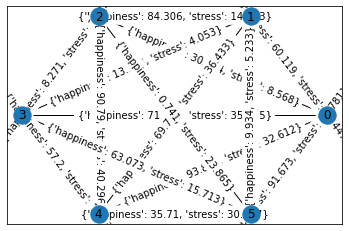

In [25]:
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos)

{(0, 1): Text(0.7499999888241293, 0.433012741974907, '3.691'),
 (0, 2): Text(0.24999998137354879, 0.4330127121725851, '25.089'),
 (0, 3): Text(1.4901160971803051e-08, -1.9206817775722963e-08, '72.377'),
 (0, 4): Text(0.25000005587935364, -0.43301269296576733, '9.087'),
 (0, 5): Text(0.7499999590218074, -0.43301269296576733, '49.284'),
 (1, 2): Text(-2.9802321943606103e-08, 0.8660254296429223, '95.552'),
 (1, 3): Text(-0.24999999627470976, 0.4330126982635194, '90.861'),
 (1, 4): Text(4.4703482915409154e-08, 2.4504569873240456e-08, '53.875'),
 (1, 5): Text(0.4999999478459366, 2.4504569873240456e-08, '91.083'),
 (2, 3): Text(-0.7500000037252903, 0.43301266846119746, '32.427'),
 (2, 4): Text(-0.49999996274709757, -5.297752070365647e-09, '55.137'),
 (2, 5): Text(-5.9604643887212205e-08, -5.297752070365647e-09, '80.426'),
 (3, 4): Text(-0.7499999292194854, -0.43301273667715495, '83.46'),
 (3, 5): Text(-0.2500000260770317, -0.43301273667715495, '30.653'),
 (4, 5): Text(1.4901160971803051e-08,

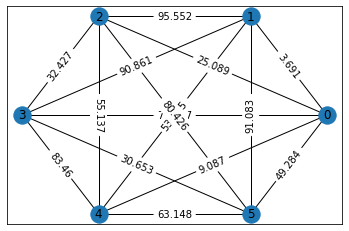

In [175]:
# show happiness
labels = nx.get_edge_attributes(G,'happiness')
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)

{(0, 1): Text(0.5828137844800949, 0.7701087892055511, '3.093'),
 (0, 2): Text(0.4010586589574814, 0.43700727075338364, '7.8'),
 (0, 3): Text(0.1687605008482933, 0.5447055250406265, '0.041'),
 (0, 4): Text(0.4814029186964035, 0.5628246068954468, '7.334'),
 (0, 5): Text(0.24900518357753754, 0.6297840476036072, '0.831'),
 (1, 2): Text(0.7175254225730896, 0.4580424353480339, '11.341'),
 (1, 3): Text(0.4852272644639015, 0.5657406896352768, '9.271'),
 (1, 4): Text(0.7978696823120117, 0.583859771490097, '10.084'),
 (1, 5): Text(0.5654719471931458, 0.6508192121982574, '1.707'),
 (2, 3): Text(0.303472138941288, 0.23263917118310928, '3.242'),
 (2, 4): Text(0.6161145567893982, 0.25075825303792953, '6.708'),
 (2, 5): Text(0.3837168216705322, 0.31771769374608994, '1.749'),
 (3, 4): Text(0.3838163986802101, 0.3584565073251724, '3.894'),
 (3, 5): Text(0.15141866356134415, 0.4254159480333328, '8.733'),
 (4, 5): Text(0.46406108140945435, 0.4435350298881531, '9.019')}

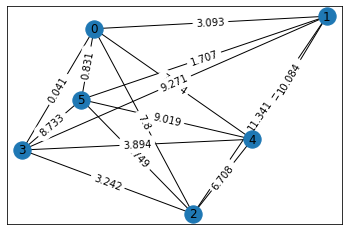

In [177]:
# show stress
pos = nx.random_layout(G)
labels = nx.get_edge_attributes(G,'stress')
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)

### 3. Test G and Solution - Using parse.py

In [181]:
D = convert_dictionary({0: [0, 2, 3], 1: [1], 2: [4], 3:[5]})
D

{0: 0, 2: 0, 3: 0, 1: 1, 4: 2, 5: 3}

In [182]:
is_valid_solution(D, G, 50, 4)

True

In [218]:
is_valid_solution({1: 0, 5: 0, 6: 0, 8: 0, 0: 1, 2: 2, 3: 3, 4: 4, 7: 5, 9: 6}, G10, 100, k)

False

In [16]:
G10, D10, k10 = create_input_graph(10, 100)
is_valid_solution(D10, G10, 100, k10)

selected:  [3, 4, 6, 7]
k:  7
n_selected_iter:  6
stress_list_selected:  [4266  871 1264 2626 3555 1701]
assigning values for selected nodes
current node:  3
edge: (3, 4), h:92.921, s:4.266
edge: (3, 6), h:85.975, s:0.871
edge: (3, 7), h:41.115, s:1.264
current node:  4
edge: (4, 6), h:91.053, s:2.626
edge: (4, 7), h:94.602, s:3.555
current node:  6
edge: (6, 7), h:63.403, s:1.701
current node:  7
assigning values for other nodes


True

In [17]:
G20, D20, k20 = create_input_graph(20, 100)
is_valid_solution(D20, G20, 100, k20)

selected:  [0, 7, 8, 10, 14]
k:  16
n_selected_iter:  10
stress_list_selected:  [ 918  532  309   99   62   96 1202  990  933 1104]
assigning values for selected nodes
current node:  0
edge: (0, 7), h:54.961, s:0.918
edge: (0, 8), h:27.623, s:0.532
edge: (0, 10), h:87.211, s:0.309
edge: (0, 14), h:38.266, s:0.099
current node:  7
edge: (7, 8), h:86.367, s:0.062
edge: (7, 10), h:36.282, s:0.096
edge: (7, 14), h:1.897, s:1.202
current node:  8
edge: (8, 10), h:26.845, s:0.99
edge: (8, 14), h:63.108, s:0.933
current node:  10
edge: (10, 14), h:64.64, s:1.104
current node:  14
assigning values for other nodes


True

In [18]:
G50, D50, k50 = create_input_graph(50, 100)
is_valid_solution(D50, G50, 100, k50)

selected:  [4, 9, 16, 22, 39, 41, 42]
k:  44
n_selected_iter:  21
stress_list_selected:  [223  13 156  32 153 127 265  18 151  27  28 225 198  26 104   1 112 102
  83  88 129]
assigning values for selected nodes
current node:  4
edge: (4, 9), h:69.984, s:0.223
edge: (4, 16), h:32.735, s:0.013
edge: (4, 22), h:72.684, s:0.156
edge: (4, 39), h:25.489, s:0.032
edge: (4, 41), h:25.457, s:0.153
edge: (4, 42), h:87.928, s:0.127
current node:  9
edge: (9, 16), h:83.981, s:0.265
edge: (9, 22), h:85.907, s:0.018
edge: (9, 39), h:73.754, s:0.151
edge: (9, 41), h:47.982, s:0.027
edge: (9, 42), h:53.374, s:0.028
current node:  16
edge: (16, 22), h:87.874, s:0.225
edge: (16, 39), h:49.66, s:0.198
edge: (16, 41), h:27.914, s:0.026
edge: (16, 42), h:41.89, s:0.104
current node:  22
edge: (22, 39), h:36.279, s:0.001
edge: (22, 41), h:66.976, s:0.112
edge: (22, 42), h:33.819, s:0.102
current node:  39
edge: (39, 41), h:61.168, s:0.083
edge: (39, 42), h:6.636, s:0.088
current node:  41
edge: (41, 42), h

True

In [19]:
input_list = [10, 20, 50]
def generate_files(input_list):
    for i in input_list:
        path = 'inputs_outputs/{}.in'
        stress_budget = 96.841
        Gi, Di, ki = create_input_graph(i, stress_budget)
        write_input_file(Gi, stress_budget, path.format(i))
        write_output_file(Di, 'inputs_outputs/{}.out'.format(i))
        print('DEBUG: ', is_valid_solution(Di, Gi, stress_budget, ki))
generate_files(input_list)

selected:  [3, 4, 8, 9]
k:  7
n_selected_iter:  6
stress_list_selected:  [2344 3930  309 2537 2453 2258]
assigning values for selected nodes
current node:  3
edge: (3, 4), h:3.99, s:2.344
edge: (3, 8), h:65.746, s:3.93
edge: (3, 9), h:1.996, s:0.309
current node:  4
edge: (4, 8), h:72.841, s:2.537
edge: (4, 9), h:65.15, s:2.453
current node:  8
edge: (8, 9), h:58.631, s:2.258
current node:  9
assigning values for other nodes
DEBUG:  True
selected:  [9, 10, 14, 18, 19]
k:  16
n_selected_iter:  10
stress_list_selected:  [572 885 779 171 203 894 979 228 573 764]
assigning values for selected nodes
current node:  9
edge: (9, 10), h:35.687, s:0.572
edge: (9, 14), h:1.034, s:0.885
edge: (9, 18), h:71.11, s:0.779
edge: (9, 19), h:82.5, s:0.171
current node:  10
edge: (10, 14), h:36.997, s:0.203
edge: (10, 18), h:22.392, s:0.894
edge: (10, 19), h:2.216, s:0.979
current node:  14
edge: (14, 18), h:75.545, s:0.228
edge: (14, 19), h:71.519, s:0.573
current node:  18
edge: (18, 19), h:39.211, s:0.

In [8]:
validate_file('inputs_outputs/50.out')

True

In [20]:
G10, s10 = read_input_file('inputs_outputs/10.in')
D10 = read_output_file('inputs_outputs/10.out', G10, s10)

# of rooms:  7
D:  {3: 0, 4: 0, 8: 0, 9: 0, 0: 1, 1: 2, 2: 3, 5: 4, 6: 5, 7: 6}


In [21]:
G20, s20 = read_input_file('inputs_outputs/20.in')
D20 = read_output_file('inputs_outputs/20.out', G20, s20)

# of rooms:  16
D:  {9: 0, 10: 0, 14: 0, 18: 0, 19: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 11: 10, 12: 11, 13: 12, 15: 13, 16: 14, 17: 15}


In [22]:
G50, s50 = read_input_file('inputs_outputs/50.in')
D50 = read_output_file('inputs_outputs/50.out', G50, s50)

# of rooms:  44
D:  {10: 0, 18: 0, 29: 0, 32: 0, 35: 0, 38: 0, 40: 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 30: 28, 31: 29, 33: 30, 34: 31, 36: 32, 37: 33, 39: 34, 41: 35, 42: 36, 43: 37, 44: 38, 45: 39, 46: 40, 47: 41, 48: 42, 49: 43}


In [23]:
is_valid_solution(D50, G50, s50, 44)

True